# standard python and R imports

In [289]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [290]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [291]:
%%R

# My commonly used R imports

require('tidyverse')

# loading data

In [292]:
%%R
data = read.csv("merged.csv")
data

    GEOID.x        NAME populationE populationM med_incE med_incM whiteE whiteM
1     10001 ZCTA5 10001       27004        1827   106509     9423  15428   1696
2     10001 ZCTA5 10001       27004        1827   106509     9423  15428   1696
3     10001 ZCTA5 10001       27004        1827   106509     9423  15428   1696
4     10002 ZCTA5 10002       76518        2894    43362     5737  23951   1688
5     10002 ZCTA5 10002       76518        2894    43362     5737  23951   1688
6     10002 ZCTA5 10002       76518        2894    43362     5737  23951   1688
7     10003 ZCTA5 10003       53877        2579   152863    10149  36515   2428
8     10004 ZCTA5 10004        4579         926   232543    14137   2653    605
9     10009 ZCTA5 10009       58418        3009    83344     8153  32738   2376
10    10009 ZCTA5 10009       58418        3009    83344     8153  32738   2376
11    10010 ZCTA5 10010       32410        2681   150288    23588  21682   2315
12    10011 ZCTA5 10011       50772     

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




69  40.86208 -73.89693 3.600502e+14    36      5  23702  1000     36005023702
70  40.82161 -73.89838 3.600501e+14    36      5  12901  1006     36005012901
71  40.83365 -73.89414 3.600502e+14    36      5  15300  1005     36005015300
72  40.83407 -73.89011 3.600502e+14    36      5  15500  2005     36005015500
73  40.83691 -73.88726 3.600502e+14    36      5  16100  4001     36005016100
74  40.84637 -73.83897 3.600503e+14    36      5  28400  1003     36005028400
75  40.89095 -73.83073 3.600505e+14    36      5  45600  2002     36005045600
76  40.87668 -73.86277 3.600504e+14    36      5  38000  4006     36005038000
77  40.87047 -73.86683 3.600503e+14    36      5  33802  1002     36005033802
78  40.88009 -73.87984 3.600504e+14    36      5  42100  1000     36005042100
79  40.88036 -73.88140 3.600504e+14    36      5  42100  1000     36005042100
80  40.88036 -73.88140 3.600504e+14    36      5  42100  1000     36005042100
81  40.88036 -73.88140 3.600504e+14    36      5  42100  1000  

In [293]:
%%R
colnames(data)

 [1] "GEOID.x"           "NAME"              "populationE"      
 [4] "populationM"       "med_incE"          "med_incM"         
 [7] "whiteE"            "whiteM"            "blackE"           
[10] "blackM"            "nativeE"           "nativeM"          
[13] "asianE"            "asianM"            "total_raceE"      
[16] "total_raceM"       "poverty_totalE"    "poverty_totalM"   
[19] "poverty_belowE"    "poverty_belowM"    "white_pct"        
[22] "black_pct"         "native_pct"        "asian_pct"        
[25] "poverty_rate_pct"  "ZIP"               "name1"            
[28] "name2"             "street1"           "street2"          
[31] "city"              "state"             "phone"            
[34] "intake1"           "intake2"           "intake1a"         
[37] "intake2a"          "service_code_info" "full_address"     
[40] "location"          "latitude"          "longitude"        
[43] "GEOID.y"           "STATE"             "COUNTY"           
[46] "TRACT"             

In [311]:
%%R
library(dplyr)
library(readr)

count_providers_by_zip <- function(data) {
  provider_counts <- data %>%
    group_by(ZIP) %>%
    summarize(provider_count = n(), .groups = "drop")

  acs_vars <- data %>%
    select(ZIP, NAME, populationE, med_incE, white_pct, asian_pct,
           black_pct, native_pct,
           poverty_totalE, poverty_belowE)

  acs_summary <- acs_vars %>%
    group_by(ZIP) %>%
    summarize(
      NAME = first(NAME),
      populationE = first(populationE),
      med_incE = first(med_incE),
      white_pct = first(white_pct),
      asian_pct = first(asian_pct),
      black_pct = first(black_pct),
      native_pct = first(native_pct),
      poverty_totalE = first(poverty_totalE),
      poverty_belowE = first(poverty_belowE),
      .groups = "drop"
    )

  provider_data <- provider_counts %>%
    left_join(acs_summary, by = "ZIP") %>%
    mutate(provider_rate = (provider_count / populationE))

  return(provider_data)
}

provider_data <- count_providers_by_zip(data)

write_csv(provider_data, "provider_data.csv")


# single variable regression for the provider rate and the median income

In [312]:
%%R

model <- lm(provider_rate~med_incE, data=provider_data)
summary(model)


Call:
lm(formula = provider_rate ~ med_incE, data = provider_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.874e-05 -1.939e-05 -9.269e-06  1.134e-05  1.724e-04 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 1.150e-05  1.003e-05   1.147  0.25599   
med_incE    3.158e-10  1.052e-10   3.001  0.00388 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.765e-05 on 62 degrees of freedom
Multiple R-squared:  0.1268,	Adjusted R-squared:  0.1127 
F-statistic: 9.004 on 1 and 62 DF,  p-value: 0.003878



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: ggrepel: 33 unlabeled data points (too many overlaps). Consider increasing max.overlaps 



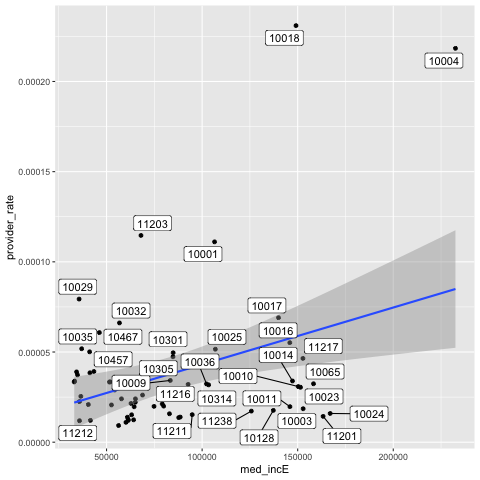

In [313]:
%%R 

ggplot(provider_data) + 
	aes(x=med_incE, y=provider_rate) + 
	geom_point() +
	geom_smooth(method='lm') +
    geom_label_repel(aes(label = ZIP))



# single variable regression for the provider_rate and poverty rate

In [314]:
%%R
provider_data <- provider_data %>%
  mutate(poverty_rate_pct = (poverty_belowE / poverty_totalE) * 100)


In [315]:
%%R

model <- lm(provider_rate~poverty_rate_pct, data=provider_data)
summary(model)


Call:
lm(formula = provider_rate ~ poverty_rate_pct, data = provider_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.119e-05 -2.147e-05 -1.159e-05  8.320e-06  1.876e-04 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.354e-05  1.150e-05   4.657 1.74e-05 ***
poverty_rate_pct -7.877e-07  5.292e-07  -1.489    0.142    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.959e-05 on 62 degrees of freedom
Multiple R-squared:  0.03451,	Adjusted R-squared:  0.01893 
F-statistic: 2.216 on 1 and 62 DF,  p-value: 0.1417



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps 



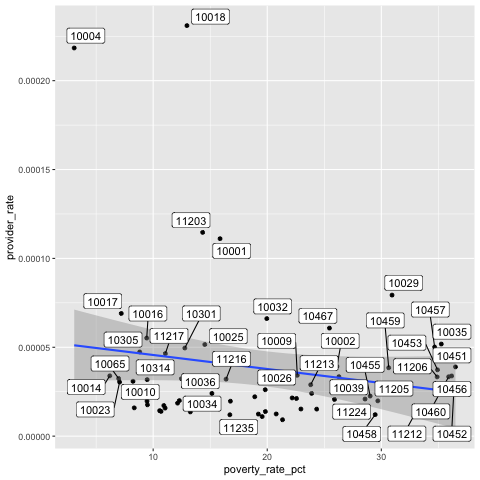

In [323]:
%%R 

ggplot(provider_data) + 
	aes(x=poverty_rate_pct, y=provider_rate) + 
	geom_point() +
	geom_smooth(method='lm') +
    geom_label_repel(aes(label = ZIP))



# Single variable regression with provider_rate and non_white

In [330]:
%%R
provider_data$non_white <- with(provider_data, asian_pct + native_pct + black_pct)
model <- lm(provider_rate ~ asian_pct, data = provider_data)
summary(model)



Call:
lm(formula = provider_rate ~ asian_pct, data = provider_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-5.521e-05 -1.761e-05 -7.928e-06  8.274e-06  1.726e-04 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.618e-05  7.245e-06   3.614 0.000605 ***
asian_pct   1.091e-06  4.930e-07   2.212 0.030638 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.878e-05 on 62 degrees of freedom
Multiple R-squared:  0.07316,	Adjusted R-squared:  0.05822 
F-statistic: 4.894 on 1 and 62 DF,  p-value: 0.03064



In [332]:
%%R
model <- lm(provider_rate ~ black_pct, data = provider_data)
summary(model)


Call:
lm(formula = provider_rate ~ black_pct, data = provider_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.998e-05 -2.037e-05 -9.162e-06  2.173e-06  1.905e-04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.128e-05  7.397e-06   5.580 5.64e-07 ***
black_pct   -1.312e-07  2.239e-07  -0.586     0.56    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.018e-05 on 62 degrees of freedom
Multiple R-squared:  0.005508,	Adjusted R-squared:  -0.01053 
F-statistic: 0.3434 on 1 and 62 DF,  p-value: 0.56



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps 



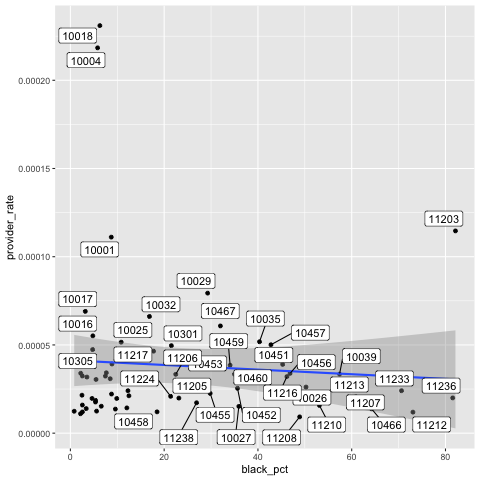

In [333]:
%%R 

ggplot(provider_data) + 
	aes(x=black_pct, y=provider_rate) + 
	geom_point() +
	geom_smooth(method='lm') +
    geom_label_repel(aes(label = ZIP))



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps 



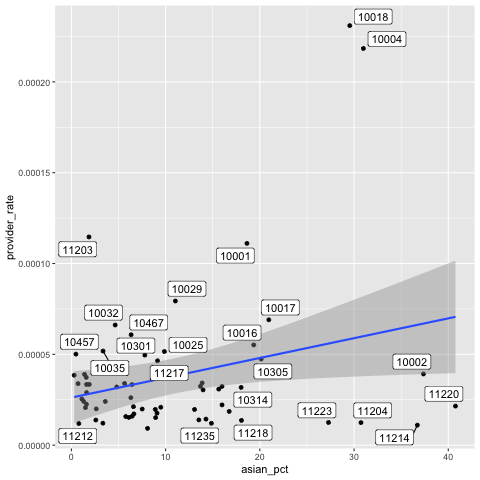

In [331]:
%%R 

ggplot(provider_data) + 
	aes(x=asian_pct, y=provider_rate) + 
	geom_point() +
	geom_smooth(method='lm') +
    geom_label_repel(aes(label = ZIP))



In [326]:
%%R
model <- lm(provider_count ~ white_pct, data = provider_data)
summary(model)



Call:
lm(formula = provider_count ~ white_pct, data = provider_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5905 -0.6810 -0.4328  0.3819  6.3897 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.717062   0.357182   7.607  1.9e-10 ***
white_pct   -0.019052   0.007575  -2.515   0.0145 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.42 on 62 degrees of freedom
Multiple R-squared:  0.09258,	Adjusted R-squared:  0.07794 
F-statistic: 6.325 on 1 and 62 DF,  p-value: 0.01451



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps 



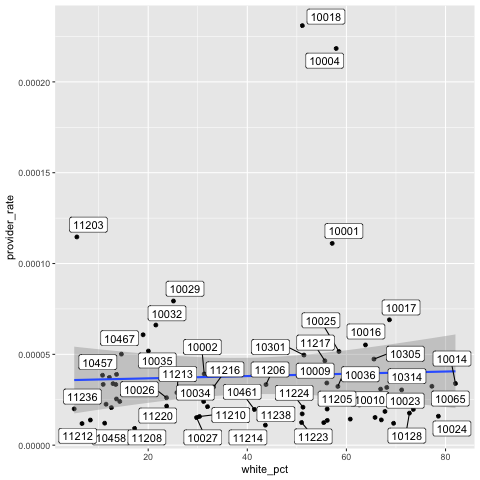

In [327]:
%%R 

ggplot(provider_data) + 
	aes(x=white_pct, y=provider_rate) + 
	geom_point() +
	geom_smooth(method='lm') +
    geom_label_repel(aes(label = ZIP))



# multivariable regression with provider rate

In [340]:
%%R

model <- lm(provider_rate~med_incE+asian_pct+native_pct+black_pct+poverty_rate_pct+white_pct, data=provider_data)
summary(model)


Call:
lm(formula = provider_rate ~ med_incE + asian_pct + native_pct + 
    black_pct + poverty_rate_pct + white_pct, data = provider_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.309e-05 -2.076e-05 -4.192e-06  1.350e-05  1.306e-04 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.525e-05  5.474e-05  -0.461   0.6463    
med_incE          8.519e-10  1.903e-10   4.476  3.7e-05 ***
asian_pct         1.348e-06  6.345e-07   2.125   0.0379 *  
native_pct       -2.549e-06  1.450e-05  -0.176   0.8611    
black_pct        -1.069e-07  5.349e-07  -0.200   0.8422    
poverty_rate_pct  1.375e-06  9.173e-07   1.499   0.1394    
white_pct        -1.127e-06  5.271e-07  -2.137   0.0369 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.371e-05 on 57 degrees of freedom
Multiple R-squared:  0.3564,	Adjusted R-squared:  0.2887 
F-statistic: 5.261 on 6 and 57 DF,  p-value: 0.0002267

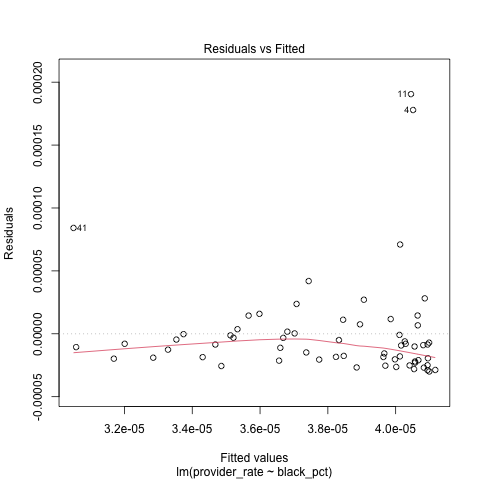

In [335]:
%%R
plot(model, which = 1)


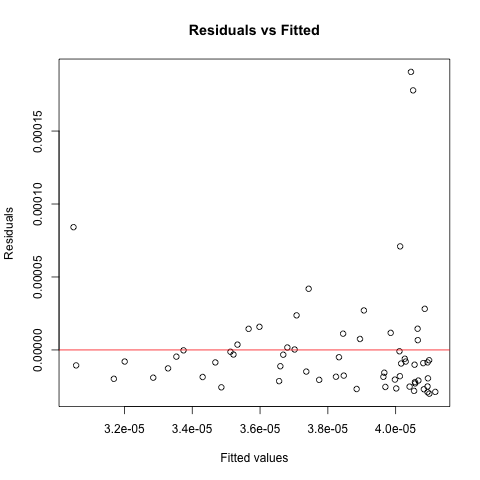

In [334]:
%%R

plot(model$fitted.values, resid(model),
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals vs Fitted")
abline(h = 0, col = "red")


In [341]:
import pandas as pd
df=pd.read_csv("merged.csv")
df

,GEOID.x,NAME,populationE,populationM,med_incE,med_incM,whiteE,whiteM,blackE,blackM,...,full_address,location,latitude,longitude,GEOID.y,STATE,COUNTY,TRACT,BLOCK,GEOID_truncated
0,10001,ZCTA5 10001,27004,1827,106509,9423,15428,1696,2355,583,...,"7 West 30Th Street, New York, NY 10001","7, West 30th Street, Koreatown, Manhattan Comm...",40.746439,-73.987050,3.606101e+14,36.0,61.0,7600.0,2000.0,3.606101e+10
1,10001,ZCTA5 10001,27004,1827,106509,9423,15428,1696,2355,583,...,"441 West 26Th Street, New York, NY 10001","John Lovejoy Elliott Center, 441, West 26th St...",40.749547,-74.001491,3.606101e+14,36.0,61.0,9700.0,2002.0,3.606101e+10
2,10001,ZCTA5 10001,27004,1827,106509,9423,15428,1696,2355,583,...,"213 West 35Th Street, New York, NY 10001","Cutlets, 213, West 35th Street, Garment Distri...",40.752001,-73.990648,3.606101e+14,36.0,61.0,10900.0,1004.0,3.606101e+10
3,10002,ZCTA5 10002,76518,2894,43362,5737,23951,1688,6785,1318,...,"46 East Broadway, New York, NY 10002","46, East Broadway, Two Bridges, Manhattan Comm...",40.713777,-73.995863,3.606100e+14,36.0,61.0,800.0,1000.0,3.606100e+10
4,10002,ZCTA5 10002,76518,2894,43362,5737,23951,1688,6785,1318,...,"46 East Broadway, New York, NY 10002","46, East Broadway, Two Bridges, Manhattan Comm...",40.713777,-73.995863,3.606100e+14,36.0,61.0,800.0,1000.0,3.606100e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,11235,ZCTA5 11235,83069,2433,61320,3114,57750,2510,2130,538,...,"2601 Ocean Parkway, Brooklyn, NY 11235","NYC Health + Hospitals: South Brooklyn Health,...",40.585459,-73.964872,3.604704e+14,36.0,47.0,37000.0,3004.0,3.604704e+10
120,11236,ZCTA5 11236,100082,3175,79885,4157,5075,722,81608,2987,...,"9413 Flatlands Avenue, Brooklyn, NY 11236","9413, Flatlands Avenue, Canarsie, Brooklyn, Ki...",40.642295,-73.902949,3.604710e+14,36.0,47.0,96800.0,2004.0,3.604710e+10
121,11236,ZCTA5 11236,100082,3175,79885,4157,5075,722,81608,2987,...,"9801 Foster Avenue, Brooklyn, NY 11236","9801, Foster Avenue, Canarsie, Brooklyn, Kings...",40.649182,-73.904837,3.604711e+14,36.0,47.0,109800.0,2004.0,3.604711e+10
122,11237,ZCTA5 11237,47183,2242,79136,6178,15083,1212,5890,1087,...,"315 Wyckoff Avenue, Brooklyn, NY 11237","315, Wyckoff Avenue, Bushwick, Brooklyn, Kings...",40.700198,-73.911790,3.604704e+14,36.0,47.0,43900.0,3000.0,3.604704e+10
